# SARIMA Model For Telangana Toll Traffic Forecasting

# Importing Data & Libraries

In [115]:
import os
import pandas as pd
import numpy as np
import matplotlib    
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [116]:
Tel = pd.read_csv('Telangana.csv', low_memory=False)

In [117]:
Tel.shape

(150, 116)

In [118]:
Tel.head()

,ProjectName,DisplayClasses,JourneyType,Dec-12,Jan-13,Feb-13,Mar-13,Apr-13,May-13,Jun-13,...,Jul-21,Aug-21,Sep-21,Oct-21,Nov-21,Dec-21,Jan-22,Feb-22,Mar-22,Apr-22
0,HYTPL,Car / Jeep / Van,Single Journey,40879.0,58789.0,50434.0,47199.0,51788.0,67135.0,56384.0,...,278644.0,327205.0,272260.0,324762.0,335091.0,345950.0,318805.0,354629.0,385136.0,136266.0
1,HYTPL,Car / Jeep / Van,Return Journey,58364.0,77906.0,77185.0,78086.0,75280.0,97876.0,86524.0,...,156616.0,183421.0,159734.0,174051.0,187448.0,197636.0,171461.0,195366.0,220054.0,76783.0
2,HYTPL,Car / Jeep / Van,Monthly pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,35.0,15.0,50.0,NaN,NaN,NaN,NaN,NaN
3,HYTPL,Car / Jeep / Van,LPU - CA,9558.0,19520.0,20107.0,21653.0,21724.0,25008.0,22485.0,...,47796.0,52927.0,48403.0,47376.0,51975.0,54727.0,45724.0,50317.0,58435.0,16534.0
4,HYTPL,Car / Jeep / Van,LPU - 50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
Tel.tail()

,ProjectName,DisplayClasses,JourneyType,Dec-12,Jan-13,Feb-13,Mar-13,Apr-13,May-13,Jun-13,...,Jul-21,Aug-21,Sep-21,Oct-21,Nov-21,Dec-21,Jan-22,Feb-22,Mar-22,Apr-22
145,HYTPL,OSV,FASTag - Double Fare Penalty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,HYTPL,OSV,Unable to classify,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,HYTPL,OSV,Monthly Pass,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,HYTPL,OSV,Non Tollable Vehicle,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149,HYTPL,OSV,Return Journey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
Tel.describe()

,Dec-12,Jan-13,Feb-13,Mar-13,Apr-13,May-13,Jun-13,Jul-13,Aug-13,Sep-13,...,Jul-21,Aug-21,Sep-21,Oct-21,Nov-21,Dec-21,Jan-22,Feb-22,Mar-22,Apr-22
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,...,70.000000,71.000000,68.000000,71.000000,72.00000,78.000000,80.000000,80.000000,83.000000,69.000000
mean,3322.000000,4736.105263,4450.894737,4576.596491,4498.701754,5313.789474,4738.894737,4080.543860,4579.087719,4063.157895,...,9709.800000,10927.732394,9680.632353,10695.042254,10885.37500,10495.294872,9242.450000,10014.362500,10972.132530,4486.811594
std,9658.703945,13588.386849,12843.196627,12839.009302,12744.625461,16187.836132,14172.011903,12094.272321,13999.973870,11886.235205,...,38497.455674,44743.831774,38418.703114,43875.618250,45369.34417,45302.293093,40608.546765,45301.547175,48894.009049,18774.757101
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,7.500000,3.000000,5.000000,2.75000,5.000000,7.000000,4.750000,4.500000,4.000000
50%,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,0.000000,0.000000,0.000000,1.000000,...,46.500000,51.000000,42.500000,38.000000,55.50000,53.500000,56.500000,54.500000,44.000000,44.000000
75%,2087.000000,2753.000000,2069.000000,2204.000000,1505.000000,1144.000000,927.000000,675.000000,758.000000,1403.000000,...,2829.500000,2815.000000,2986.750000,3237.500000,2929.75000,2203.250000,1113.500000,1279.500000,1117.500000,1375.000000
max,58364.000000,77906.000000,77185.000000,78086.000000,75280.000000,97876.000000,86524.000000,73450.000000,86467.000000,73540.000000,...,278644.000000,327205.000000,272260.000000,324762.000000,335091.00000,345950.000000,318805.000000,354629.000000,385136.000000,136266.000000


# Exploratory Data Analysis

In [121]:
#checking for Null Values

Tel.isnull().sum()

ProjectName        0
DisplayClasses     0
JourneyType        6
Dec-12            93
Jan-13            93
                  ..
Dec-21            72
Jan-22            70
Feb-22            70
Mar-22            67
Apr-22            81
Length: 116, dtype: int64

In [122]:
Tel = Tel.drop(labels=['ProjectName'], axis=1)


In [123]:
display(Tel)

,DisplayClasses,JourneyType,Dec-12,Jan-13,Feb-13,Mar-13,Apr-13,May-13,Jun-13,Jul-13,...,Jul-21,Aug-21,Sep-21,Oct-21,Nov-21,Dec-21,Jan-22,Feb-22,Mar-22,Apr-22
0,Car / Jeep / Van,Single Journey,40879.0,58789.0,50434.0,47199.0,51788.0,67135.0,56384.0,45410.0,...,278644.0,327205.0,272260.0,324762.0,335091.0,345950.0,318805.0,354629.0,385136.0,136266.0
1,Car / Jeep / Van,Return Journey,58364.0,77906.0,77185.0,78086.0,75280.0,97876.0,86524.0,73450.0,...,156616.0,183421.0,159734.0,174051.0,187448.0,197636.0,171461.0,195366.0,220054.0,76783.0
2,Car / Jeep / Van,Monthly pass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,35.0,15.0,50.0,NaN,NaN,NaN,NaN,NaN
3,Car / Jeep / Van,LPU - CA,9558.0,19520.0,20107.0,21653.0,21724.0,25008.0,22485.0,21456.0,...,47796.0,52927.0,48403.0,47376.0,51975.0,54727.0,45724.0,50317.0,58435.0,16534.0
4,Car / Jeep / Van,LPU - 50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,OSV,FASTag - Double Fare Penalty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,OSV,Unable to classify,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,OSV,Monthly Pass,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,OSV,Non Tollable Vehicle,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
Tel2=Tel.groupby(['DisplayClasses'], as_index=False)['Dec-12','Jan-13','Feb-13','Mar-13','Apr-13','May-13','Jun-13','Jul-13','Aug-13','Sep-13','Oct-13','Nov-13','Dec-13','Jan-14','Feb-14'].sum()

In [125]:
Tel3=Tel.groupby(['DisplayClasses'], as_index=False)['Dec-12','Jan-13','Feb-13','Mar-13','Apr-13','May-13','Jun-13','Jul-13','Aug-13','Sep-13','Oct-13','Nov-13','Dec-13','Jan-14','Feb-14','Mar-14','Apr-14','May-14','Jun-14','Jul-14','Aug-14','Sep-14','Oct-14','Nov-14','Dec-14','Jan-15','Feb-15','Mar-15','Apr-15', 'May-15', 'Jun-15', 'Jul-15', 'Aug-15', 'Sep-15', 'Oct-15','Nov-15','Dec-15','Jan-16','Feb-16','Mar-16','Apr-16','May-16','Jun-16','Jul-16','Aug-16','Sep-16','Oct-16','Nov-16','Dec-16','Jan-17','Feb-17','Mar-17','Apr-17','May-17','Jun-17','Jul-17','Aug-17','Sep-17','Oct-17','Nov-17','Dec-17','Jan-18','Feb-18','Mar-18','Apr-18','May-18','Jun-18','Jul-18','Aug-18','Sep-18','Oct-18','Nov-18','Dec-18','Jan-19','Feb-19','Mar-19','Apr-19','May-19','Jun-19','Jul-19','Aug-19','Sep-19','Oct-19','Nov-19','Dec-19','Jan-20','Feb-20','Mar-20','Apr-20','May-20','Jun-20','Jul-20','Aug-20','Sep-20','Oct-20','Nov-20','Dec-20','Jan-21','Feb-21','Mar-21','Apr-21','May-21','Jun-21','Jul-21','Aug-21','Sep-21','Oct-21','Nov-21','Dec-21','Jan-22','Feb-22','Mar-22'].sum()

In [126]:
Tel3

,DisplayClasses,Dec-12,Jan-13,Feb-13,Mar-13,Apr-13,May-13,Jun-13,Jul-13,Aug-13,...,Jun-21,Jul-21,Aug-21,Sep-21,Oct-21,Nov-21,Dec-21,Jan-22,Feb-22,Mar-22
0,Bus 2 Axle,18647.0,36034.0,32055.0,32954.0,32347.0,34948.0,31562.0,32196.0,30521.0,...,21687.0,30955.0,39924.0,38825.0,43571.0,41585.0,42100.0,39336.0,39719.0,46067.0
1,Car / Jeep / Van,130144.0,180766.0,170326.0,170869.0,172936.0,216810.0,189934.0,158982.0,187483.0,...,457925.0,558699.0,645133.0,545477.0,616976.0,646431.0,671446.0,601976.0,671742.0,738798.0
2,LCV/Mini Bus,15401.0,18113.0,16538.0,18062.0,16861.0,18528.0,17473.0,14757.0,16460.0,...,16663.0,18283.0,19419.0,17397.0,18771.0,18944.0,20719.0,19313.0,21642.0,25073.0
3,MAV 4 - 6 Axle,17910.0,25429.0,25839.0,28947.0,25303.0,23151.0,21994.0,18629.0,18773.0,...,67732.0,50234.0,48735.0,34689.0,54902.0,52364.0,57848.0,52459.0,44070.0,69229.0
4,OSV,1.0,4.0,8.0,7.0,15.0,8.0,5.0,3.0,2.0,...,2.0,8.0,8.0,2.0,12.0,6.0,12.0,10.0,14.0,15.0
5,Truck 2 Axle,7251.0,9612.0,8935.0,10027.0,8964.0,9441.0,9149.0,8024.0,7769.0,...,10315.0,11174.0,11902.0,12093.0,14011.0,13357.0,13853.0,13584.0,12825.0,17029.0
6,Truck/Bus 3 Axle,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9560.0,10333.0,10748.0,9800.0,11105.0,11060.0,12655.0,12718.0,11137.0,14476.0


In [128]:
#Filtering only the EV vehicles 
Tel4 = Tel3[(Tel3.DisplayClasses != "LCV/Mini Bus") & (Tel3.DisplayClasses != "Bus 2 Axle") & (Tel3.DisplayClasses != "Oversized") & 
           (Tel3.DisplayClasses != "OSV") & (Tel3.DisplayClasses != "Truck/Bus 3 Axle") & (Tel3.DisplayClasses != "3 Axle Vehicle")& (Tel3.DisplayClasses != "MAV 4 - 6 Axle")
          & (Tel3.DisplayClasses != "Truck 2 Axle")]

In [129]:
Tel4

,DisplayClasses,Dec-12,Jan-13,Feb-13,Mar-13,Apr-13,May-13,Jun-13,Jul-13,Aug-13,...,Jun-21,Jul-21,Aug-21,Sep-21,Oct-21,Nov-21,Dec-21,Jan-22,Feb-22,Mar-22
1,Car / Jeep / Van,130144.0,180766.0,170326.0,170869.0,172936.0,216810.0,189934.0,158982.0,187483.0,...,457925.0,558699.0,645133.0,545477.0,616976.0,646431.0,671446.0,601976.0,671742.0,738798.0


In [130]:
df_unpivoted = Tel4.melt(id_vars=['DisplayClasses'], value_name='Car / Jeep / Van')

In [131]:
df_unpivoted= df_unpivoted.rename(columns = {"variable":"Month_year"})
df_unpivoted

,DisplayClasses,Month_year,Car / Jeep / Van
0,Car / Jeep / Van,Dec-12,130144.0
1,Car / Jeep / Van,Jan-13,180766.0
2,Car / Jeep / Van,Feb-13,170326.0
3,Car / Jeep / Van,Mar-13,170869.0
4,Car / Jeep / Van,Apr-13,172936.0
...,...,...,...
107,Car / Jeep / Van,Nov-21,646431.0
108,Car / Jeep / Van,Dec-21,671446.0
109,Car / Jeep / Van,Jan-22,601976.0
110,Car / Jeep / Van,Feb-22,671742.0


In [132]:
#Month wise Totall Traffic
df_unpivoted.drop(['DisplayClasses'], axis = 1)

,Month_year,Car / Jeep / Van
0,Dec-12,130144.0
1,Jan-13,180766.0
2,Feb-13,170326.0
3,Mar-13,170869.0
4,Apr-13,172936.0
...,...,...
107,Nov-21,646431.0
108,Dec-21,671446.0
109,Jan-22,601976.0
110,Feb-22,671742.0


In [133]:
df_unpivoted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DisplayClasses    112 non-null    object 
 1   Month_year        112 non-null    object 
 2   Car / Jeep / Van  112 non-null    float64
dtypes: float64(1), object(2)
memory usage: 2.8+ KB


In [134]:
#Month_year(format) column to Date column conversion

df = pd.DataFrame()

df['date'] = pd.date_range('12/1/2012', periods=113, freq='M')  
print(df)

          date
0   2012-12-31
1   2013-01-31
2   2013-02-28
3   2013-03-31
4   2013-04-30
..         ...
108 2021-12-31
109 2022-01-31
110 2022-02-28
111 2022-03-31
112 2022-04-30

[113 rows x 1 columns]


In [135]:
pd.concat([df_unpivoted, df.reindex(df_unpivoted.index)], axis=1)

,DisplayClasses,Month_year,Car / Jeep / Van,date
0,Car / Jeep / Van,Dec-12,130144.0,2012-12-31
1,Car / Jeep / Van,Jan-13,180766.0,2013-01-31
2,Car / Jeep / Van,Feb-13,170326.0,2013-02-28
3,Car / Jeep / Van,Mar-13,170869.0,2013-03-31
4,Car / Jeep / Van,Apr-13,172936.0,2013-04-30
...,...,...,...,...
107,Car / Jeep / Van,Nov-21,646431.0,2021-11-30
108,Car / Jeep / Van,Dec-21,671446.0,2021-12-31
109,Car / Jeep / Van,Jan-22,601976.0,2022-01-31
110,Car / Jeep / Van,Feb-22,671742.0,2022-02-28


#Time Series Model

In [136]:
df1= df_unpivoted.drop(labels=['DisplayClasses'], axis=1)
df1.rename(columns = {'Car / Jeep / Van':'Traffic'}, inplace = True)
df1

,Month_year,Traffic
0,Dec-12,130144.0
1,Jan-13,180766.0
2,Feb-13,170326.0
3,Mar-13,170869.0
4,Apr-13,172936.0
...,...,...
107,Nov-21,646431.0
108,Dec-21,671446.0
109,Jan-22,601976.0
110,Feb-22,671742.0


In [137]:
df2 = pd.concat([df1, df.reindex(df1.index)], axis=1)


In [138]:
df3= df2.drop(labels=['Month_year'], axis=1)

print(df3)

      Traffic       date
0    130144.0 2012-12-31
1    180766.0 2013-01-31
2    170326.0 2013-02-28
3    170869.0 2013-03-31
4    172936.0 2013-04-30
..        ...        ...
107  646431.0 2021-11-30
108  671446.0 2021-12-31
109  601976.0 2022-01-31
110  671742.0 2022-02-28
111  738798.0 2022-03-31

[112 rows x 2 columns]


In [139]:
df3.date = pd.to_datetime(df3.date).dt.strftime('%m/%Y')
df3.rename(columns = {'date':'Month_year'}, inplace = True)

print (df3)

      Traffic Month_year
0    130144.0    12/2012
1    180766.0    01/2013
2    170326.0    02/2013
3    170869.0    03/2013
4    172936.0    04/2013
..        ...        ...
107  646431.0    11/2021
108  671446.0    12/2021
109  601976.0    01/2022
110  671742.0    02/2022
111  738798.0    03/2022

[112 rows x 2 columns]


In [140]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Traffic     112 non-null    float64
 1   Month_year  112 non-null    object 
dtypes: float64(1), object(1)
memory usage: 1.9+ KB


In [141]:
df3.head()

,Traffic,Month_year
0,130144.0,12/2012
1,180766.0,01/2013
2,170326.0,02/2013
3,170869.0,03/2013
4,172936.0,04/2013


In [142]:
df4 = df3[['Month_year', 'Traffic']]
df4

,Month_year,Traffic
0,12/2012,130144.0
1,01/2013,180766.0
2,02/2013,170326.0
3,03/2013,170869.0
4,04/2013,172936.0
...,...,...
107,11/2021,646431.0
108,12/2021,671446.0
109,01/2022,601976.0
110,02/2022,671742.0


In [143]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month_year  112 non-null    object 
 1   Traffic     112 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.9+ KB


In [144]:
df4.tail(60)

,Month_year,Traffic
52,04/2017,290318.0
53,05/2017,313243.0
54,06/2017,290698.0
55,07/2017,264729.0
56,08/2017,296681.0
57,09/2017,260243.0
58,10/2017,294116.0
59,11/2017,303416.0
60,12/2017,305417.0
61,01/2018,326943.0


In [145]:
df4.head(56)

,Month_year,Traffic
0,12/2012,130144.0
1,01/2013,180766.0
2,02/2013,170326.0
3,03/2013,170869.0
4,04/2013,172936.0
5,05/2013,216810.0
6,06/2013,189934.0
7,07/2013,158982.0
8,08/2013,187483.0
9,09/2013,160570.0


In [146]:
    df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month_year  112 non-null    object 
 1   Traffic     112 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.9+ KB


In [147]:
df4.tail(60)

,Month_year,Traffic
52,04/2017,290318.0
53,05/2017,313243.0
54,06/2017,290698.0
55,07/2017,264729.0
56,08/2017,296681.0
57,09/2017,260243.0
58,10/2017,294116.0
59,11/2017,303416.0
60,12/2017,305417.0
61,01/2018,326943.0


In [148]:
i1 = df4[(df4['Traffic'] == 'Month_year')].index
i1

Int64Index([], dtype='int64')

In [149]:
train= df4.iloc[:112]
train

,Month_year,Traffic
0,12/2012,130144.0
1,01/2013,180766.0
2,02/2013,170326.0
3,03/2013,170869.0
4,04/2013,172936.0
...,...,...
107,11/2021,646431.0
108,12/2021,671446.0
109,01/2022,601976.0
110,02/2022,671742.0


# Removing Outliers

In [150]:
#Outliers detected during covid period for the months Apr'20, May'20 & May'21 & for the year 2016 in the month of November

In [151]:
train = train.drop(train.index[[47,88,89,101]])

In [152]:
train.head(50)

,Month_year,Traffic
0,12/2012,130144.0
1,01/2013,180766.0
2,02/2013,170326.0
3,03/2013,170869.0
4,04/2013,172936.0
5,05/2013,216810.0
6,06/2013,189934.0
7,07/2013,158982.0
8,08/2013,187483.0
9,09/2013,160570.0


In [153]:
train.tail(60)

,Month_year,Traffic
49,01/2017,270730.0
50,02/2017,258252.0
51,03/2017,275281.0
52,04/2017,290318.0
53,05/2017,313243.0
54,06/2017,290698.0
55,07/2017,264729.0
56,08/2017,296681.0
57,09/2017,260243.0
58,10/2017,294116.0


In [154]:
#train.shape

In [155]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 0 to 111
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month_year  108 non-null    object 
 1   Traffic     108 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


In [156]:
train.columns = ['Month_year','Traffic']
train['Month_year'] = pd.to_datetime(train['Month_year'], format='%m/%Y')
train = train.set_index('Month_year')
train.head()

,Traffic
Month_year,
2012-12-01,130144.0
2013-01-01,180766.0
2013-02-01,170326.0
2013-03-01,170869.0
2013-04-01,172936.0


In [157]:
ts=pd.Series(train['Traffic'])

In [158]:
ts.dtype

dtype('float64')

In [159]:
print(ts)

Month_year
2012-12-01    130144.0
2013-01-01    180766.0
2013-02-01    170326.0
2013-03-01    170869.0
2013-04-01    172936.0
                ...   
2021-11-01    646431.0
2021-12-01    671446.0
2022-01-01    601976.0
2022-02-01    671742.0
2022-03-01    738798.0
Name: Traffic, Length: 108, dtype: float64


# Visualization & Stationarity Test

In [160]:
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

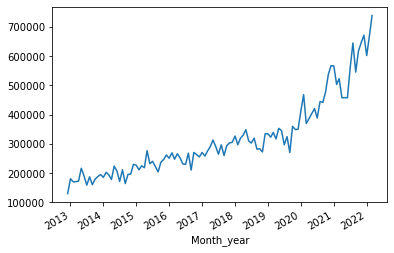

In [161]:
ts.plot()
plt.show()

In [162]:
ts.head(60)

Month_year
2012-12-01    130144.0
2013-01-01    180766.0
2013-02-01    170326.0
2013-03-01    170869.0
2013-04-01    172936.0
2013-05-01    216810.0
2013-06-01    189934.0
2013-07-01    158982.0
2013-08-01    187483.0
2013-09-01    160570.0
2013-10-01    179352.0
2013-11-01    188305.0
2013-12-01    195079.0
2014-01-01    185614.0
2014-02-01    202796.0
2014-03-01    194726.0
2014-04-01    178577.0
2014-05-01    224178.0
2014-06-01    206759.0
2014-07-01    171745.0
2014-08-01    211548.0
2014-09-01    164506.0
2014-10-01    195448.0
2014-11-01    197011.0
2014-12-01    230170.0
2015-01-01    226890.0
2015-02-01    211387.0
2015-03-01    225122.0
2015-04-01    218574.0
2015-05-01    276995.0
2015-06-01    232369.0
2015-07-01    240526.0
2015-08-01    222466.0
2015-09-01    204479.0
2015-10-01    237255.0
2015-11-01    246678.0
2015-12-01    262100.0
2016-01-01    250928.0
2016-02-01    269378.0
2016-03-01    247794.0
2016-04-01    266367.0
2016-05-01    252000.0
2016-06-01    231630.0


In [163]:
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from math import sqrt

In [164]:
from matplotlib.pyplot import *
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot

In [165]:
#Dickey-Fuller stationarity Test
def check_stationarity(y, lags_plots=20, figsize=(22,8)):
    "Use Series as parameter"
    
    # Creating plots of the DF
    y = pd.Series(ts)
    fig = plt.figure()

    ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
    ax2 = plt.subplot2grid((3, 3), (1, 0))
    ax3 = plt.subplot2grid((3, 3), (1, 1))
    ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=2)

    y.plot(ax=ax1, figsize=figsize)
    ax1.set_title('Traffic')
    plot_acf(y, lags=lags_plots, zero=False, ax=ax2);
    plot_pacf(y, lags=lags_plots, zero=False, ax=ax3);
    sns.distplot(y, bins=int(sqrt(len(y))), ax=ax4)
    ax4.set_title('Distribution Chart')

    plt.tight_layout()
    
    print('Results of Dickey-Fuller Test:')
    adfinput = adfuller(y)
    adftest = pd.Series(adfinput[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    adftest = round(adftest,4)
    
    for key, value in adfinput[4].items():
        adftest["Critical Value (%s)"%key] = value.round(4)
        
    print(adftest)
    
    if adftest[0].round(2) < adftest[5].round(2):
        print('\nThe Test Statistics is lower than the Critical Value of 5%.\nThe series seems to be stationary')
    else:
        print("\nThe Test Statistics is higher than the Critical Value of 5%.\nThe series isn't stationary")

Results of Dickey-Fuller Test:
Test Statistic                   3.7663
p-value                          1.0000
Lags Used                        7.0000
Number of Observations Used    100.0000
Critical Value (1%)             -3.4975
Critical Value (5%)             -2.8909
Critical Value (10%)            -2.5824
dtype: float64

The Test Statistics is higher than the Critical Value of 5%.
The series isn't stationary


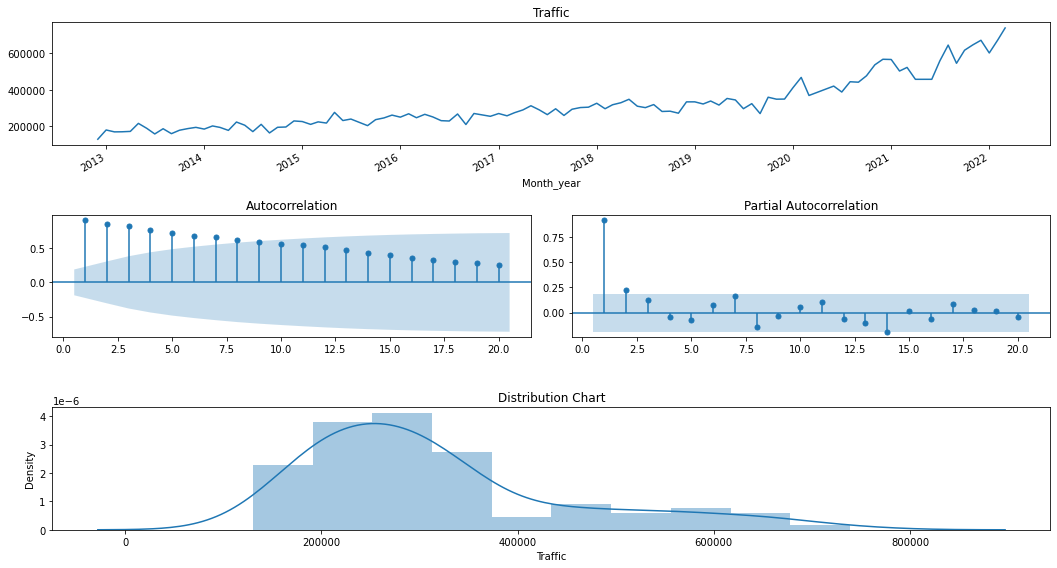

In [166]:
check_stationarity(ts)

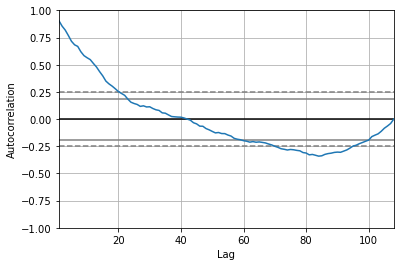

In [167]:
autocorrelation_plot(ts)
plt.show()
#We can see that there is positive correlation with the first 10-15 lags and next 22-25 lags
#that is perhaps significant for first two 

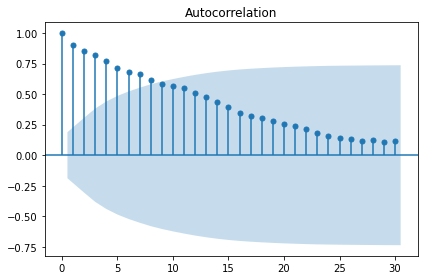

In [168]:
#ACF Plot
plot_acf(ts, lags=30);

plt.tight_layout()

plt.savefig('ACFts.png', dpi=300)

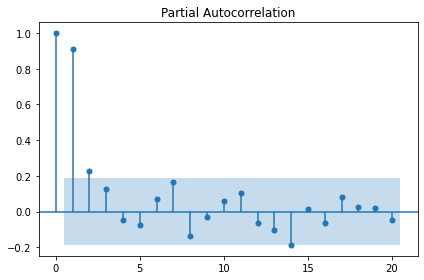

In [169]:
#PACF Plot
plot_pacf(ts, lags=20);

plt.tight_layout()

plt.savefig('PACFts.png', dpi=300)

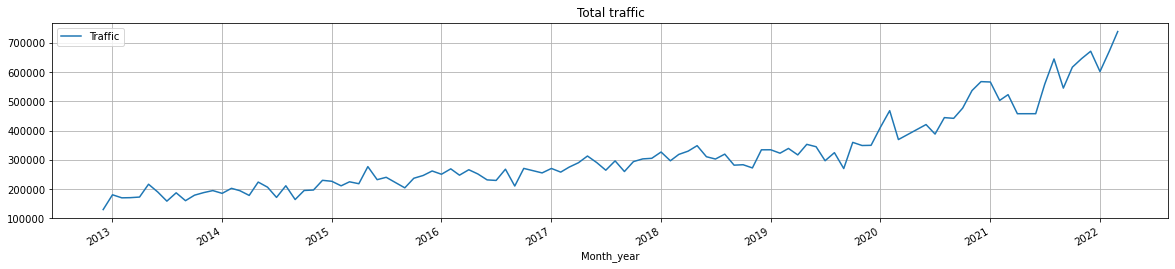

In [170]:
#Time Series Plot
ts.plot(figsize=(20, 4))
plt.grid()
plt.legend(loc='best')
plt.title('Total traffic')
plt.show(block=False)

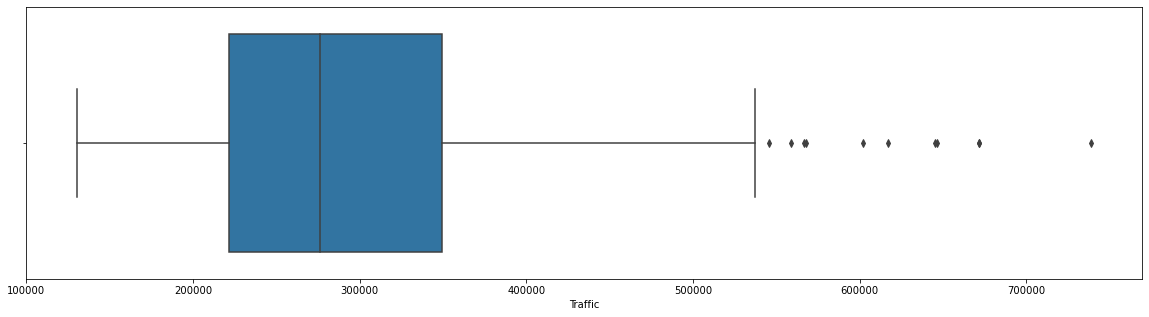

In [171]:
#Box plot and interquartile range 
fig = plt.subplots(figsize=(20, 5))
ax = sns.boxplot(x=ts,whis=1.5)

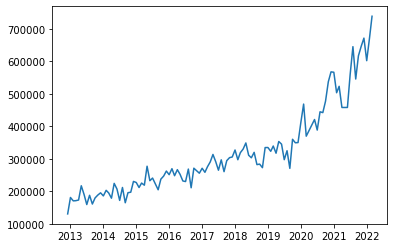

In [172]:

plt.plot(ts)

# Data Preparation & Time Series Modelling

In [173]:
#AIC metric calculation for identifying the correct seasonal & non-seasonal order for Train Data

In [174]:
from itertools import product 
from tqdm import tqdm_notebook
import itertools as it

In [175]:
def optimize_SARIMA(parameters_list, d, D, s, exog):
    """
        Return dataframe with parameters, corresponding AIC and SSE
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
        exog - the exogenous variable
    """
    
    results = []
    
    for param in tqdm_notebook(parameters_list):
        try: 
            model = SARIMAX(exog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        results.append([param, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [176]:
p = range(0, 12, 1)
d = 1
q = range(0, 12, 1)
P = range(0, 12, 1)
D = 1
Q = range(0, 12, 1)
s = 12
parameters = product(p, q, P, Q)
parameters_list = list(parameters)
print(len(parameters_list))

20736


In [177]:
p = d = q = range(0, 2)
pdq = list(it.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(it.product(p, d, q))]
print('Examples of parameter for SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter for SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [178]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            result=('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
            print (result)
        except: 
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3033.837127848451
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2656.0831723842803
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2419.9837018057624
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2119.5902752700654
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2374.7538521958477
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2352.676080144934
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2122.244207658405
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2079.6689654116317
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2935.3355701131027
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2592.180583733397
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2360.1001416461277
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2065.716252565533
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2634.2077905451197
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2581.394385731034
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2112.3217539283946
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2051.2559959083574
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2538.317614554213
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2261.7722805965223

# SARIMA model for final prediction

In [179]:
#SARIMA model with best achieved AIC value
mod = sm.tsa.statespace.SARIMAX(ts,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results1 = mod.fit()
print(results1.summary().tables[1])



                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4400      0.104     -4.245      0.000      -0.643      -0.237
ma.S.L12      -0.7996      0.113     -7.104      0.000      -1.020      -0.579
sigma2      2.136e+09   1.14e-11   1.87e+20      0.000    2.14e+09    2.14e+09


In [180]:
import statsmodels.api as sm

In [181]:
best_model = sm.tsa.statespace.SARIMAX(ts, order=(0,1,1), seasonal_order=(0, 1, 1, 12)).fit(dis=-1)
print(best_model.summary())


                                     SARIMAX Results                                      
Dep. Variable:                            Traffic   No. Observations:                  108
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1142.065
Date:                            Mon, 04 Jul 2022   AIC                           2290.131
Time:                                    20:00:47   BIC                           2297.792
Sample:                                         0   HQIC                          2293.227
                                            - 108                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4206      0.101     -4.161      0.000      -0.619      -0.222
ma.S.L12      -0.7192      0.127   

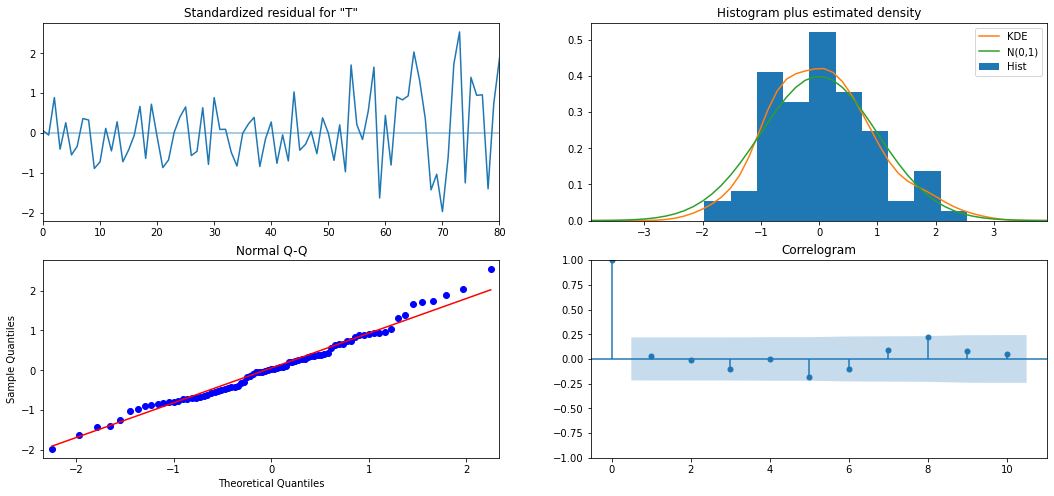

In [182]:
results1.plot_diagnostics(figsize=(18, 8))
plt.show()

In [183]:
#Getting Predictions from Apr'22 to Sep'22

index_future_dates=pd.date_range(start='2022-04',end='2022-10',freq='M')
Prediction = best_model.predict(start=len(ts) ,end= ts.shape[0] + 5,typ='levels')
Prediction.index= index_future_dates
print (Prediction)

2022-04-30    729108.169300
2022-05-31    716771.996020
2022-06-30    703406.008476
2022-07-31    740423.557707
2022-08-31    767517.578253
2022-09-30    748325.234856
Freq: M, Name: predicted_mean, dtype: float64


In [184]:
#Plotting the train data and the final predictions

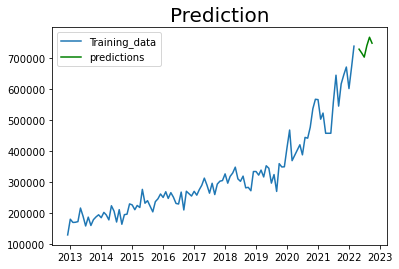

In [185]:
plt.title('Prediction', size=20)
plt.plot(train['Traffic'], label= 'Training_data')
plt.plot(Prediction, color='green', label= 'predictions')
plt.legend();

In [186]:
#Viewing predictions for a year(additional)
index_future_dates=pd.date_range(start='2022-04',end='2023-01',freq='M')
L5=best_model.predict(start=len(ts) ,end= ts.shape[0] + 8,typ='levels')
L5.index= index_future_dates
print (L5)

2022-04-30    729108.169300
2022-05-31    716771.996020
2022-06-30    703406.008476
2022-07-31    740423.557707
2022-08-31    767517.578253
2022-09-30    748325.234856
2022-10-31    753730.240439
2022-11-30    775658.522750
2022-12-31    783615.238759
Freq: M, Name: predicted_mean, dtype: float64


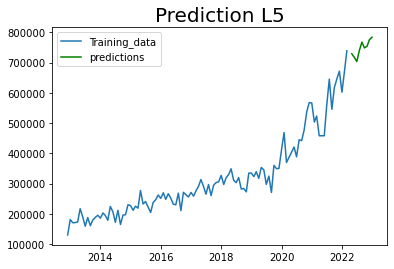

In [187]:
plt.title('Prediction L5', size=20)
#plt.figure(figsize=(20,5))
plt.plot(train['Traffic'], label= 'Training_data')
plt.plot(L5, color='green', label= 'predictions')
plt.legend();